# Preliminary results for Fire and Falls

In [13]:
from ultralytics import YOLO

## Case 1: Fire detection

### Choose a model
- Reference: [vod](https://www.youtube.com/watch?v=TyeTtAsVMOc) | [git](https://github.com/freedomwebtech/yolo11_seg_fire_alert_msg) 

In [38]:
model_name = "./models/fire-detection.pt"
model = YOLO(model_name)
print (f'모델 클래스: {model.model.names}')

모델 클래스: {0: 'Smoke', 1: 'fire'}


- input

In [34]:
from IPython.display import Video

In [100]:
input_video = "./samples/video/fire.mp4"

In [101]:
Video(input_video, embed=False, width=800, height=600)

### detection

In [103]:
import time
from IPython.display import clear_output

In [108]:
resutls = model.track(
    source=input_video,
    stream=True,
    show=False,
    save=True,
    augment=False
)

In [109]:
names = model.model.names
for idx, result in enumerate(resutls):
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    
    
    class_id = boxes.cls.int().tolist()
    
    if idx > 500: break
    
    
    # clear_output(wait=True)
    # #result.show()  # display to screen
    # if idx % 30 == 0:
    #     result.save(filename=f'./results/result_{idx}.jpg')  # save to disk
    
    # # 잠시 대기 (필요한 경우)
    # #time.sleep(0.5)  # 0.5초 대기


video 1/1 (frame 1/975) /home/ec2-user/SageMaker/host-yolov8-on-sagemaker-endpoint/sm-notebook/samples/video/fire.mp4: 384x640 (no detections), 80.0ms
video 1/1 (frame 2/975) /home/ec2-user/SageMaker/host-yolov8-on-sagemaker-endpoint/sm-notebook/samples/video/fire.mp4: 384x640 (no detections), 64.8ms
video 1/1 (frame 3/975) /home/ec2-user/SageMaker/host-yolov8-on-sagemaker-endpoint/sm-notebook/samples/video/fire.mp4: 384x640 (no detections), 64.6ms
video 1/1 (frame 4/975) /home/ec2-user/SageMaker/host-yolov8-on-sagemaker-endpoint/sm-notebook/samples/video/fire.mp4: 384x640 (no detections), 66.3ms
video 1/1 (frame 5/975) /home/ec2-user/SageMaker/host-yolov8-on-sagemaker-endpoint/sm-notebook/samples/video/fire.mp4: 384x640 (no detections), 62.4ms
video 1/1 (frame 6/975) /home/ec2-user/SageMaker/host-yolov8-on-sagemaker-endpoint/sm-notebook/samples/video/fire.mp4: 384x640 (no detections), 62.1ms
video 1/1 (frame 7/975) /home/ec2-user/SageMaker/host-yolov8-on-sagemaker-endpoint/sm-noteboo


KeyboardInterrupt



## Case 2: Fall detection

### Choose a model

In [135]:
model_name = "./models/yolo11x-pose.pt"
model = YOLO(model_name)
print (f'모델 클래스: {model.model.names}')

모델 클래스: {0: 'person'}


- input

In [251]:
input_image = "./samples/img/rest.png"
#input_image = "./samples/img/stand.png"

### Detection

In [252]:
results = model.predict(
    source=input_image,
    show=False,
    save=True,
    augment=False
)


image 1/1 /home/ec2-user/SageMaker/host-yolov8-on-sagemaker-endpoint/sm-notebook/samples/img/rest.png: 352x640 1 person, 227.1ms
Speed: 1.7ms preprocess, 227.1ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/pose/predict2


In [253]:
keypoints.data[0]

tensor([[2.2224e+02, 1.6582e+02, 9.9729e-01],
        [2.3956e+02, 1.4879e+02, 9.9760e-01],
        [2.1394e+02, 1.5025e+02, 8.8251e-01],
        [2.8092e+02, 1.4863e+02, 9.9564e-01],
        [0.0000e+00, 0.0000e+00, 1.0623e-01],
        [3.3768e+02, 2.4057e+02, 9.9943e-01],
        [2.0158e+02, 2.5339e+02, 9.9794e-01],
        [3.8469e+02, 3.5759e+02, 9.9542e-01],
        [1.7960e+02, 3.5795e+02, 9.8477e-01],
        [4.0544e+02, 4.6014e+02, 9.9571e-01],
        [1.6025e+02, 4.5119e+02, 9.8865e-01],
        [3.0826e+02, 4.5868e+02, 9.9919e-01],
        [2.4414e+02, 4.6634e+02, 9.9893e-01],
        [2.3986e+02, 6.0801e+02, 9.9777e-01],
        [3.0023e+02, 6.3102e+02, 9.9672e-01],
        [2.0882e+02, 7.9073e+02, 9.5177e-01],
        [3.5936e+02, 7.7110e+02, 9.4743e-01]])

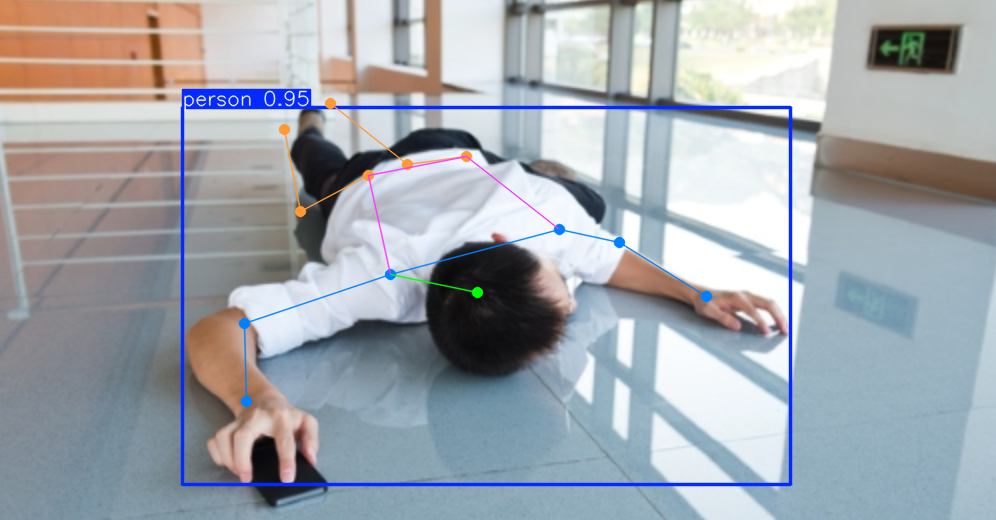

쓰러진 상태입니다!


In [254]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk
    
    process_pose_detection(keypoints)

In [255]:
import numpy as np

def is_person_fallen(keypoints_data):
    """
    YOLO Pose keypoints를 분석하여 사람이 쓰러졌는지 판단하는 함수
    
    keypoints index 참고:
    5,6: 어깨 (왼쪽, 오른쪽)
    15,16: 발목 (왼쪽, 오른쪽)
    
    Returns:
        bool: 쓰러졌으면 True, 서있으면 False
    """
    # keypoints의 좌표값 추출 (xy tensor 사용)
    xy_coords = keypoints_data.xy[0]  # 첫 번째 인스턴스의 좌표값
    
    # 신뢰도 값 추출
    confidence = keypoints_data.conf[0]
    
    # 필요한 키포인트 추출
    left_shoulder = xy_coords[5]
    right_shoulder = xy_coords[6]
    left_ankle = xy_coords[15]
    right_ankle = xy_coords[16]
    
    # 해당 키포인트들의 신뢰도 확인
    confidence_threshold = 0.1
    key_confidences = confidence[[5,6,15,16]]
    if not all(key_confidences > confidence_threshold):
        return None  # 신뢰도가 낮은 경우 판단 보류
    
    # 어깨의 평균 y좌표 계산
    shoulder_y = (left_shoulder[1] + right_shoulder[1]) / 2
    
    # 발목의 평균 y좌표 계산
    ankle_y = (left_ankle[1] + right_ankle[1]) / 2
    
    # 수직 거리 계산
    vertical_distance = ankle_y - shoulder_y
    
    # 수평 거리 계산
    shoulder_x = (left_shoulder[0] + right_shoulder[0]) / 2
    ankle_x = (left_ankle[0] + right_ankle[0]) / 2
    horizontal_distance = abs(ankle_x - shoulder_x)
    
    # 기울기 계산
    angle = np.arctan2(vertical_distance, horizontal_distance)
    angle_degrees = np.degrees(angle)
    
    # 임계값 설정 (45도)
    ANGLE_THRESHOLD = 45
    
    # 각도가 임계값보다 작으면 쓰러진 것으로 판단
    return angle_degrees < ANGLE_THRESHOLD

# 사용 예시
def process_pose_detection(pose_results):
    fallen_status = is_person_fallen(pose_results)
    if fallen_status is None:
        print("키포인트 신뢰도가 낮아 판단할 수 없습니다.")
    elif fallen_status:
        print("쓰러진 상태입니다!")
    else:
        print("정상적으로 서있는 상태입니다.")

In [256]:
process_pose_detection(keypoints)

쓰러진 상태입니다!
